1. Del artículo:
https://www.nature.com/articles/s41598-020-59821-7

Consultar y explicar los dos métodos de reducción de ruido usados en el artículo: Robust LOESS y Non Local Means (10%), mostrar cómo se podrían implementar en Python (5%)

https://virtual.cuautitlan.unam.mx/intar/?page_id=1108#:~:text=Las%20wavelets%20pueden%20ser%20irregulares,,%20la%20wavelet%20Symlet,%20etc
https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01349-x

2. De la base de datos extraer los registros que correspondan a bradicardia sinusal (SB Sinus Bradycardia) y fibrilación auricular (AFIB Atrial Fibrillation). De estos registros los análisis para el presente proyecto deben hacerse en la derivación II.

In [1]:
import os , math ; import pandas as pd ; import numpy as np ; import matplotlib.pyplot as plt ; from scipy import signal
#from google.colab import drive
# drive.mount('/content/drive')
# !pip install PyWavelets
import pywt
# !cp /content/drive/MyDrive/Biosenales/ECGData.zip .
# !unzip ECGData.zip


In [ ]:
directorio_actual=os.getcwd()
archivos=os.listdir(directorio_actual + "/ECGData")
#file_path = '/content/drive/MyDrive/Biosenales/Diagnostics.xlsx'
file_path = 'E:\ACTUAL\BIOSIGNALS\GIT\LAB_ISA_ZAM\Lab_Biosenales\Proyecto_3\Diagnostics.xlsx'

Diagnostics = pd.read_excel(file_path, sheet_name='Sheet1')    # Extraer clasificaciones sujetos
Col_Nombres = pd.DataFrame(Diagnostics.iloc[:,0:2])

Nombres_SB = Col_Nombres[Col_Nombres['Rhythm']=='SB']
Nombres_AFIB = Col_Nombres[Col_Nombres['Rhythm']=='AFIB']

lista_filtrada_SB=[] #Lista con los datos de SB y AFIB
lista_filtrada_AFIB=[] #Lista con los datos de AFIB

for i in range(len(archivos)):
    if archivos[i] in Nombres_SB['FileName'].values+'.csv':
      lista_filtrada_SB.append(archivos[i])

    if archivos[i] in Nombres_AFIB['FileName'].values+'.csv':
        lista_filtrada_AFIB.append(archivos[i])

In [4]:
Derivacion2_AFIB=[]
Derivacion2_SB=[]

for i in lista_filtrada_AFIB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_AFIB.append(datos['II'])

for i in lista_filtrada_SB:
    datos = pd.read_csv(directorio_actual+"/ECGData/"+i,delimiter=',',names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4','V5','V6'])
    Derivacion2_SB.append(datos['II'])
    
Derivacion2_AFIB=np.array(Derivacion2_AFIB)
Derivacion2_SB=np.array(pd.DataFrame(Derivacion2_SB))

In [5]:
def Str2Num_Vector(vector):
    vector_numeros = []
    for elemento in vector:
        vector_numeros.append(float(elemento))
    return vector_numeros

In [ ]:
#Se quita el primer valor de los arreglos que es un 'II'
Der2_AFIB=np.delete(Derivacion2_AFIB,0,axis=1)
Der2_SB=np.delete(Derivacion2_SB,0,axis=1)

#Se pasan todos los datos de string a float 
for i in range(len(Der2_AFIB)):
  Der2_AFIB[i]=Str2Num_Vector(Der2_AFIB[i])
for i in range(len(Der2_SB)):
  Der2_SB[i]=Str2Num_Vector(Der2_SB[i])
print("DATOS AFIB: ",Der2_AFIB.shape)
print("DATOS SB: "  ,Der2_SB.shape)

DATOS AFIB:  (1780, 5000)
DATOS SB:  (3889, 5000)


3. Consultar que otros tipos de señales wavelet se pueden usar para el análisis de señales ECG y adaptar el código del filtro wavelet que se entrega en el curso de acuerdo a la consulta (10%)

De acuerdo a la teoría, entre más similar sea la forma de onda de la señal wavelet, mejor será la eliminación del ruido de la señal [1]. Algunos tipos de wavelet que son implementados para analizar señales de ECG son el wavelet Daubechies [2] y el Wavelet Symlet [3] y ambos presentan una simetría similar a la onda del complejo QRS.
Múltiples estudios han analizado las estucturas y familias de transformadas wavelet con el objetivo de eliminar las desviaciones de linea base de señales ECG, siendo las familias de wavelets Daubechies-3 y Symlets-3 transformadas con un desempeño destacable [4], siendo la métrica de evaluación el error cuadrático medio (MSE). Para contruir estos tipos de wavelets fue necesario emplear 7 niveles de transformada.

---

[1] “Transformada Wavelet – acervo para el mejoramiento del aprendizaje de alumnos de ingeniería, en Inteligencia Artificial”. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://virtual.cuautitlan.unam.mx/intar/?page_id=1108#:~:text=Las%20wavelets%20pueden%20ser%20irregulares,,%20la%20wavelet%20Symlet,%20etc.

[2] “Vista de Las wavelets en el análisis de ECG”. Revistas UTP. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://revistas.utp.edu.co/index.php/revistaciencia/article/view/13781/9361

[3] “Caracterización con wavelets de alteraciones electrocardiográficas en pacientes con enfermedad de Chagas”. SciELO Colombia- Scientific Electronic Library Online. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: http://www.scielo.org.co/scielo.php?script=sci_arttext&amp;pid=S0121-37092015000200009

[4] “Comparing different wavelet transforms on removing electrocardiogram baseline wanders and special trends - BMC Medical Informatics and Decision Making”. BioMed Central. Accedido el 1 de noviembre de 2024. [En línea]. Disponible: https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-01349-x


### Según lo anterior, se comparan los Wavelet Daubechies (db3) y Symlet (sym3) para determinar el que será utilizado en el flujo posterior de trabajo.

In [17]:
print(pywt.Wavelet('db3'))
print(pywt.Wavelet('sym3'))

Wavelet db3
  Family name:    Daubechies
  Short name:     db
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False
Wavelet sym3
  Family name:    Symlets
  Short name:     sym
  Filters length: 6
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


[]

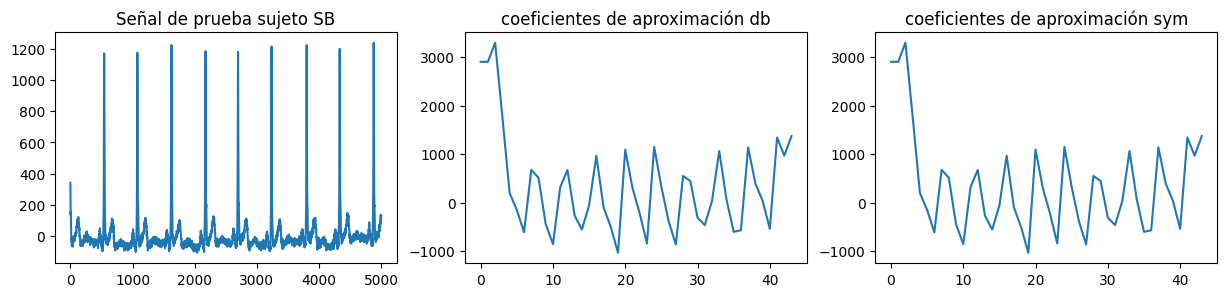

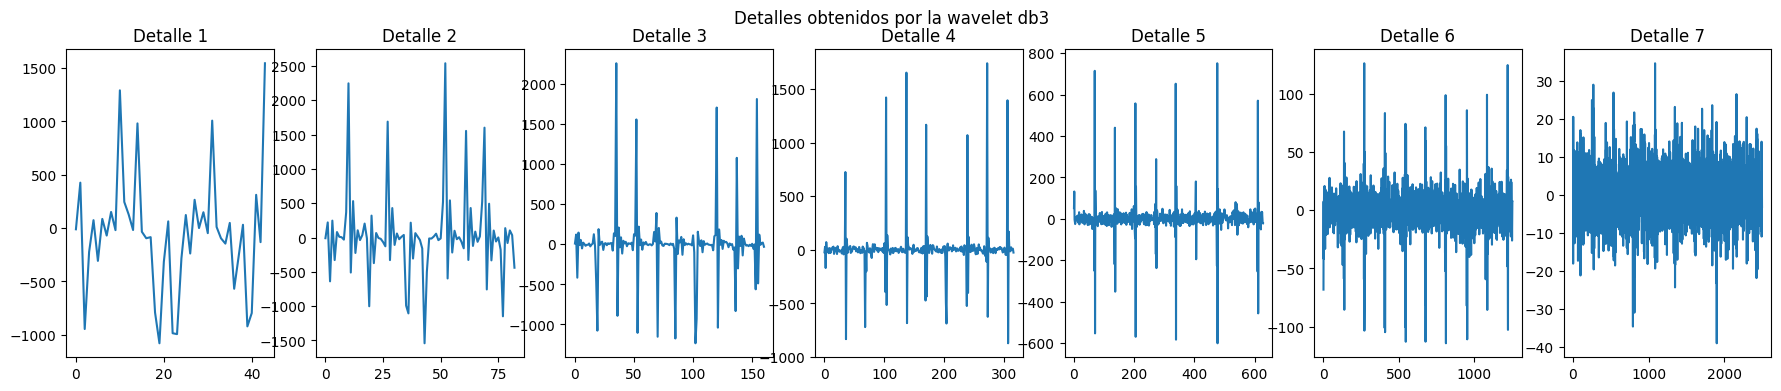

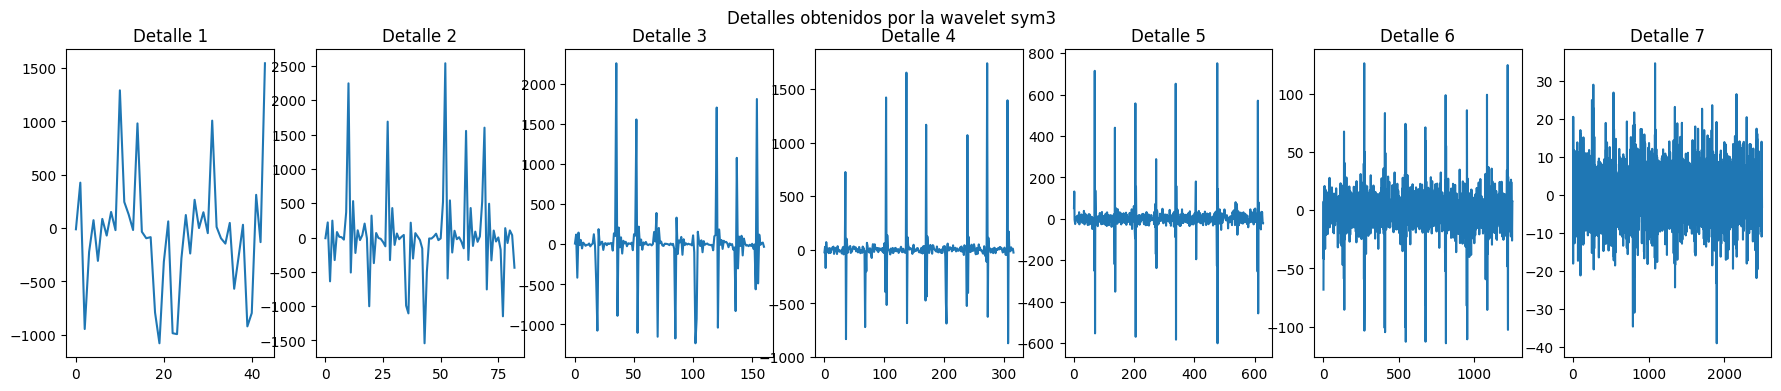

In [90]:
#Wavelet Daubechies 3
data_wavelet_db = pywt.wavedec( Der2_SB[0], 'db3', level=7 )
details_db = data_wavelet_db[1:]
#Wavelet Symlets 3
data_wavelet_sym = pywt.wavedec( Der2_SB[0], 'sym3', level=7 )
details_sym = data_wavelet_sym[1:]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
axes[0].plot(Der2_SB[0])            ; axes[0].set_title('Señal de prueba sujeto SB')
axes[1].plot(data_wavelet_db[0])    ; axes[1].set_title('coeficientes de aproximación db')
axes[2].plot(data_wavelet_sym[0])    ; axes[2].set_title('coeficientes de aproximación sym')

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(22, 4))
plt.suptitle("Detalles obtenidos por la wavelet db3")
axes[0].plot(data_wavelet_db[1])    ; axes[0].set_title('Detalle 1')
axes[1].plot(data_wavelet_db[2])    ; axes[1].set_title('Detalle 2')
axes[2].plot(data_wavelet_db[3])    ; axes[2].set_title('Detalle 3')
axes[3].plot(data_wavelet_db[4])    ; axes[3].set_title('Detalle 4')
axes[4].plot(data_wavelet_db[5])    ; axes[4].set_title('Detalle 5')
axes[5].plot(data_wavelet_db[6])    ; axes[5].set_title('Detalle 6')
axes[6].plot(data_wavelet_db[7])    ; axes[6].set_title('Detalle 7')

fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(22, 4))
plt.suptitle("Detalles obtenidos por la wavelet sym3")
axes[0].plot(data_wavelet_sym[1])    ; axes[0].set_title('Detalle 1')
axes[1].plot(data_wavelet_sym[2])    ; axes[1].set_title('Detalle 2')
axes[2].plot(data_wavelet_sym[3])    ; axes[2].set_title('Detalle 3')
axes[3].plot(data_wavelet_sym[4])    ; axes[3].set_title('Detalle 4')
axes[4].plot(data_wavelet_sym[5])    ; axes[4].set_title('Detalle 5')
axes[5].plot(data_wavelet_sym[6])    ; axes[5].set_title('Detalle 6')
axes[6].plot(data_wavelet_sym[7])    ; axes[6].set_title('Detalle 7')

plt.plot()

### Con lo cuál, dado que ambas wavelet consultadas muestran resultados equivalentes, se aplica el flujo de trabajo utilizando el Wavelet Daubechies (db3) 

4. Escoger 10 señales al azar y aplicar un flujo de procesamiento que conste de:

In [91]:
from random import randint
senal_aleatoria_AFIB=[]
senal_aleatoria_SB=[]
for i in range(10):
  senal_aleatoria_AFIB.append(Der2_AFIB[randint(0,len(Der2_AFIB))])
  senal_aleatoria_SB.append(Der2_SB[randint(0,len(Der2_SB))])

senal_aleatoria_AFIB=np.array(senal_aleatoria_AFIB)
senal_aleatoria_SB=np.array(senal_aleatoria_SB)
print("SEÑALES ALEATORIAS SB: ",    senal_aleatoria_SB.shape)
print("SEÑALES ALEATORIAS AFIB: ",  senal_aleatoria_AFIB.shape)

SEÑALES ALEATORIAS SB:  (10, 5000)
SEÑALES ALEATORIAS AFIB:  (10, 5000)


Basados en varios estudios [5][6], se usará un filtro FIR pasa bajas con una ventana tipo **Kaiser** pues ha demostrado una mejor efectividad a la hora de eliminar ruido de las señales ECG en comparación a otras ventanas.

En el caso del filtro pasa altas, en la literatura [7] también se encontró que una ventana tipo **Kaiser** se pueden eliminar los ruidos de la señal sin generar grandes distorsiones en su forma de onda.

El orden será calculado empleando las **tablas** con los reportes de la liteartura para cada ventana proporcionadas en clase y la frecuencia de muestreo especificada en la base de datos que es de 500 Hz.

---


[5] bharati sharma. “"Analysis of Various Window Techniques used for denoising ECG signal"”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/27783089/_Analysis_of_Various_Window_Techniques_used_for_denoising_ECG_signal_

[6] I. R. Publications. “Performance Comparison of Windowing Techniques for ECG Signal Enhancement”. Academia.edu - Find Research Papers, Topics, Researchers. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://www.academia.edu/9884525/Performance_Comparison_of_Windowing_Techniques_for_ECG_Signal_Enhancement

[7] Manoj, Vinod Kumar y Sanjeev Kumar Dhull. IJRAT - International Journal of Research in Advent Technology. Accedido el 2 de noviembre de 2024. [En línea]. Disponible: https://ijrat.org/downloads/Vol-2/may-2014/paper%20ID-252014114.pdf


### Se define una función por cada flujo:

# Flujo 1
1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [93]:
def Flujo1(senal):
  Fs=500
  orden= 3.6/(50/Fs)
  orden = math.floor(orden) #Orden 

  nyquist = Fs/2 # frecuencia de nyquist
  wn_hp = 0.5/nyquist #frecuencia de corte normalizada respecto nyquist para pasa altas
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## PASA ALTAS
  highpass_fir = signal.firwin(orden+1,wn_hp, pass_zero = 'highpass',window=('kaiser',6)) #filtro pasa altas
  senal_filtrada_f1 = signal.filtfilt(b=highpass_fir,a=1,x=senal) # aplicación del filtro

  ## APLICACION WAVELET MODIFICADO
  senal_filtrada_f1 = pywt.wavedec( senal_filtrada_f1, 'db3', level=7 )
  senal_filtrada_f1 = pywt.waverec(senal_filtrada_f1, 'db3') #Se reconstruye la señal con los coeficientes del wavelet

  ## PASABAJAS
  lowpass_fir = signal.firwin(orden+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f1 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f1) # aplicación del filtro

  return senal_filtrada_f1

### EJEMPLO FLUJO 1

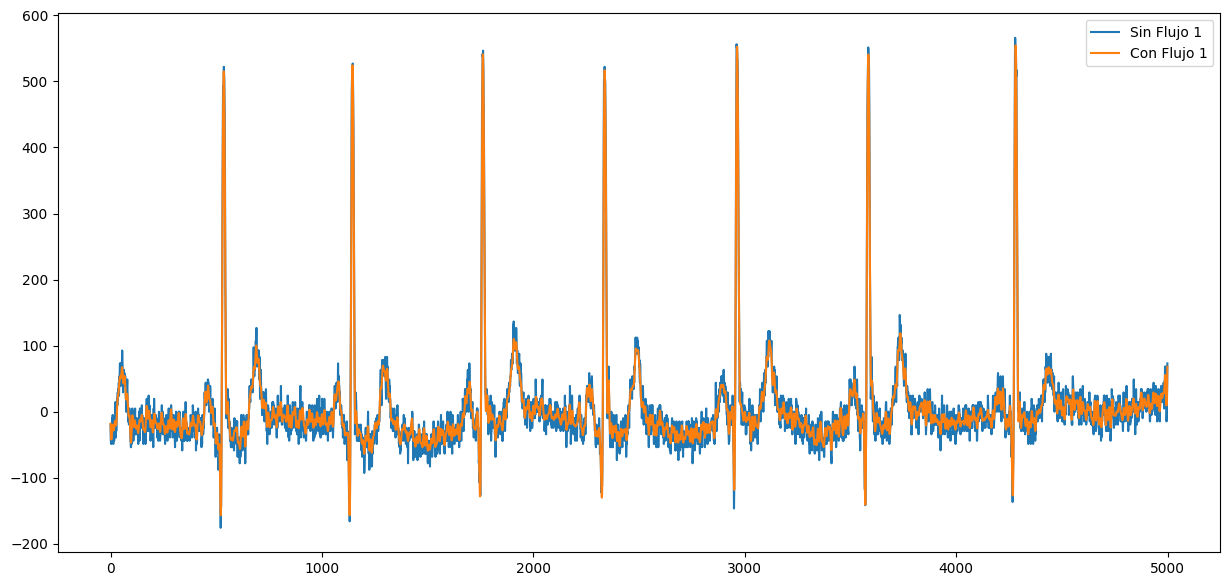

In [94]:
senal_aleatoria_SB_F1 = []
for i in range(len(senal_aleatoria_SB)):
  senalF1=Flujo1(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F1.append(senalF1)

plt.figure(figsize=(15, 7))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 1")
plt.plot(senal_aleatoria_SB_F1[0],label="Con Flujo 1")
plt.legend()
plt.show()

# Flujo 2
1. Detrend
2. Filtro wavelet modificado del punto 3
3. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [95]:
def Flujo2(senal):
  Fs=500
  orden_lp= 3.6/(50/Fs)
  orden_lp = math.floor(orden_lp) #Orden pasa bajas

  nyquist = Fs/2 # frecuencia de nyquist
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## DETREND
  senal_filtrada_f2=signal.detrend(senal)

  ## APLICACION WAVELET MODIFICADO
  senal_filtrada_f2 = pywt.wavedec( senal_filtrada_f2, 'db3', level=7 )
  senal_filtrada_f2 = pywt.waverec(senal_filtrada_f2, 'db3') #Se reconstruye la señal con los coeficientes del wavelet

  ## PASA BAJAS
  lowpass_fir = signal.firwin(orden_lp+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f2 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f2) # aplicación del filtro

  return senal_filtrada_f2

### EJEMPLO FLUJO 2

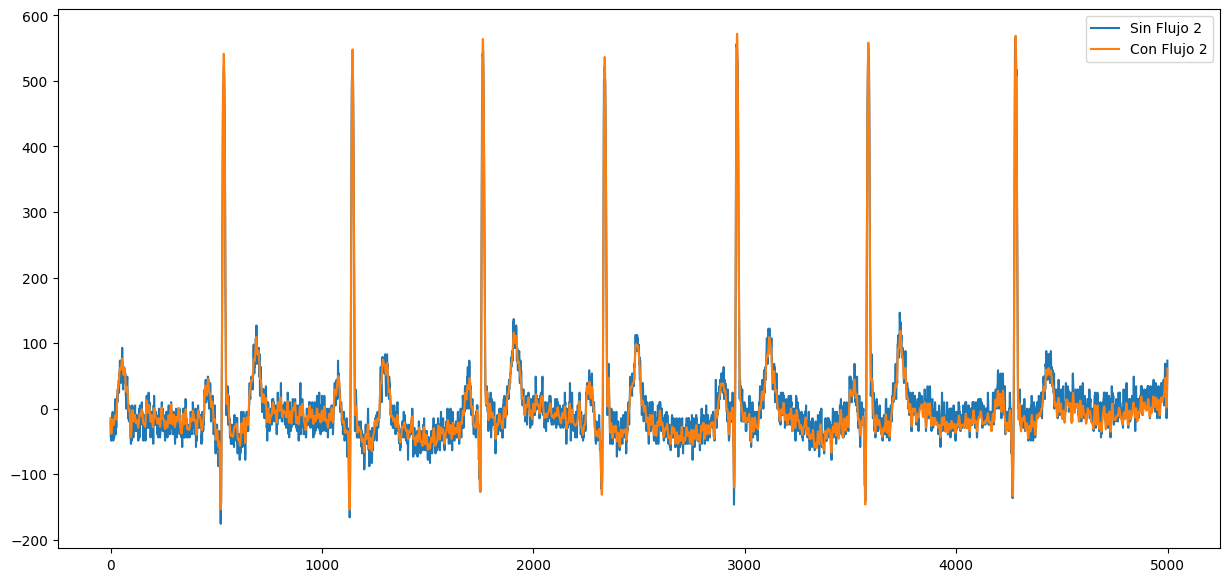

In [101]:
senal_aleatoria_SB_F2 = []
for i in range(len(senal_aleatoria_SB)):
  senalF2=Flujo2(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F2.append(senalF2)
  
plt.figure(figsize=(15, 7))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 2")
plt.plot(senal_aleatoria_SB_F2[0],label="Con Flujo 2")
plt.legend()
plt.show()

# Flujo 3
1. Filtro pasa-altas usando filtro IIR a 0.5 Hz. Justificar la elección de parámetros y si se usa FIR o IIR
2. Filtrado pasabajas 50 Hz. Justificar la elección de parámetros y si se usa FIR o IIR

In [102]:
def Flujo3(senal):
  Fs=500
  orden= 3.6/(50/Fs)
  orden = math.floor(orden) #Orden

  nyquist = Fs/2 # frecuencia de nyquist
  wn_hp = 0.5/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas
  wn_lp = 50/nyquist #frecuencia de corte normalizada respecto nyquist para pasa bajas

  ## PASA ALTAS
  highpass_fir = signal.firwin(orden+1,wn_hp, pass_zero = 'highpass',window=('kaiser',6)) #filtro pasa altas
  senal_filtrada_f3 = signal.filtfilt(b=highpass_fir,a=1,x=senal) # aplicación del filtro

  ## PASA BAJAS
  lowpass_fir = signal.firwin(orden+1,wn_lp, pass_zero = 'lowpass',window=('kaiser',6)) #filtro pasabajas
  senal_filtrada_f3 = signal.filtfilt(b=lowpass_fir,a=1,x=senal_filtrada_f3) # aplicación del filtro

  return senal_filtrada_f3

### EJEMPLO FLUJO 3

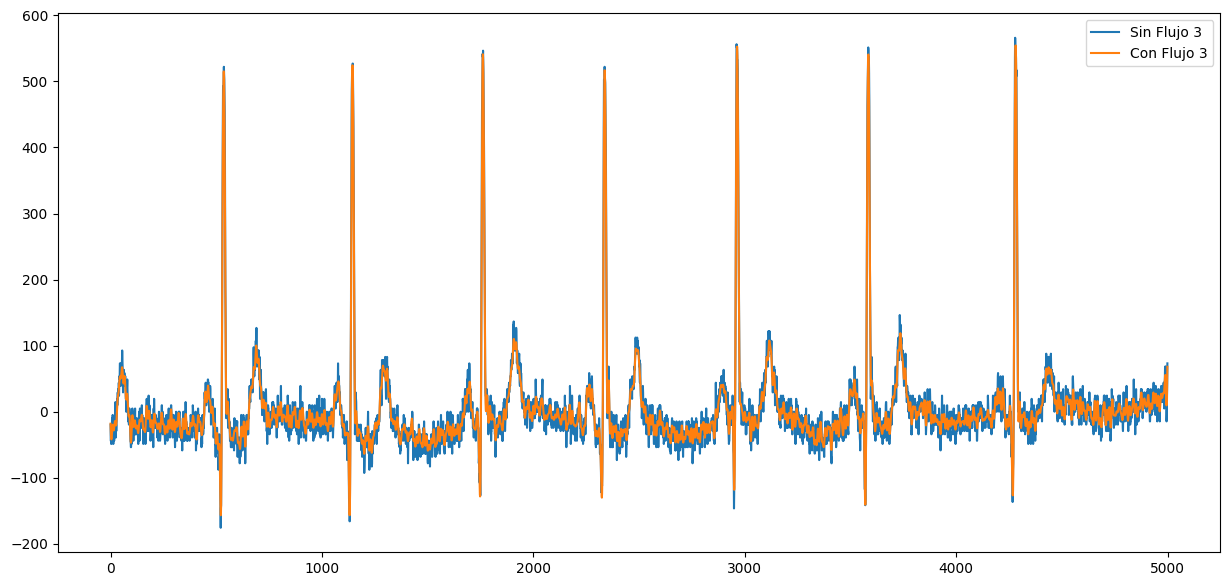

In [103]:
senal_aleatoria_SB_F3 = []
for i in range(len(senal_aleatoria_SB)):
  senalF3=Flujo3(senal_aleatoria_SB[i].astype(float))
  senal_aleatoria_SB_F3.append(senalF3)
  
plt.figure(figsize=(15, 7))
plt.plot(senal_aleatoria_SB[0],label="Sin Flujo 3")
plt.plot(senal_aleatoria_SB_F3[0],label="Con Flujo 3")
plt.legend()
plt.show()

**Describir los resultados obtenidos y decidir si el resto del procesamiento se hace con el flujo 1, el flujo 2 o el flujo 3 (20%)**

**Con el flujo seleccionado procesar las señales de la base de datos ECGData.zip derivación II.**

**A las señales filtradas con el flujo seleccionado aplicar el procesamiento de normalización usado en el proyecto 2.**



In [104]:
def comprimir(senal):
    x_min = np.amin(senal)
    x_max = np.amax(senal)
    Datos_comprimir = (senal - x_min) / (x_max - x_min)
    return Datos_comprimir

In [106]:
def Detrend(senal):
  senal_detrend=signal.detrend(senal)
  return senal_detrend

5. Para cada señal extraer la frecuencia que contiene la máxima potencia usando Welch (15%)

In [108]:
def Frec_MaxPot(senal):
  Fs=500
  nperseg=1000
  noverlap = int(nperseg/2)
  f, Pxx_den = signal.welch(np.array(senal), Fs,'hann' ,nperseg, noverlap)
  indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
  frecuencia_maxima = f[indice_max]
  return frecuencia_maxima


4.5


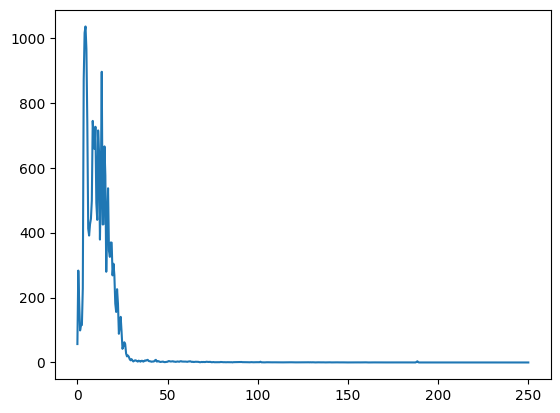

In [113]:
Fs=500
nperseg=1000
noverlap = int(nperseg/2)
f, Pxx_den = signal.welch(np.array(Der2_AFIB[0].tolist()), Fs,'hann' ,nperseg, noverlap)
indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
frecuencia_maxima = f[indice_max]
plt.plot(f,Pxx_den)
#plt.xlim(0,5)
print(Frec_MaxPot(Der2_AFIB[0].tolist()))


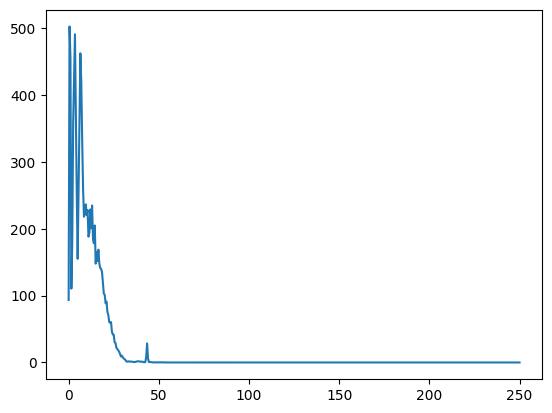

In [115]:
b=Frec_MaxPot(senal_aleatoria_SB_F2[0])

Fs=500
nperseg=1000
noverlap = int(nperseg/2)
f, Pxx_den = signal.welch(np.array(senal_aleatoria_SB_F3[0]), Fs,'hann' ,nperseg, noverlap)
indice_max = np.argmax(Pxx_den) # nos da el indice, Encontrar la frecuencia con la máxima potencia
frecuencia_maxima = f[indice_max]

plt.plot(f,Pxx_den)

6. Crear una rutina que aplique sobre todos los archivos de la base de datos las rutina 3 al 5 y almacene los resultados en un dataframe donde se pueda registro, tipo de patología y el frecuencia de máxima potencia (fMP)

7. Comparar los resultados de fMP del proyecto 3 con los del proyecto 2 usando estadística descriptiva: gráficos y pruebas de hipótesis (15%) Discuta si hay más diferencias entre los tipos de señales con el flujo de procesamiento propuesto respecto al que se trabajó en el proyecto 2.

8. Hacer un informe con todos los puntos anteriores (15%)
